In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

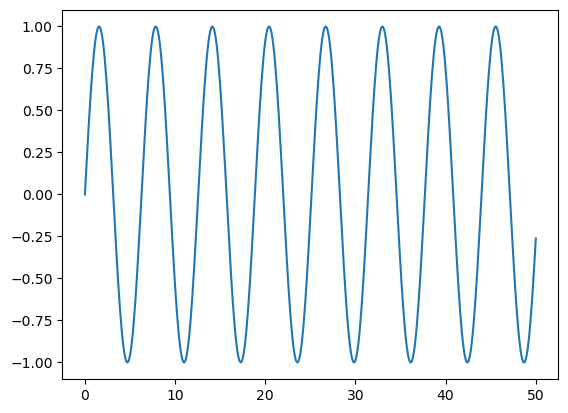

In [4]:
plt.plot(x,y)

In [5]:
df = pd.DataFrame(data = y, index = x, columns = ['Sine'])

In [6]:
len(df)

501

In [7]:
test_percent = 0.1

In [8]:
len(df) * test_percent

50.1

In [9]:
test_point = np.round(len(df)*test_percent)

In [10]:
test_ind = int(len(df) - test_point)

In [11]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
length = 25
batch_size = 1 

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size= batch_size)

In [17]:
X,y = generator[0]

In [18]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [19]:
y

array([[0.79923759]])

In [20]:
length = 50
batch_size = 1 

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size= batch_size)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [23]:
n_features=1

In [24]:
model = Sequential()
model.add(SimpleRNN(50, input_shape = (length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(generator,epochs=5)

Epoch 1/5
  4/401 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1592 

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0148
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 3.0803e-04
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 1.5385e-05
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 1.2507e-04
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 8.3188e-05


In [27]:
losses = pd.DataFrame(model.history.history)

<Axes: >

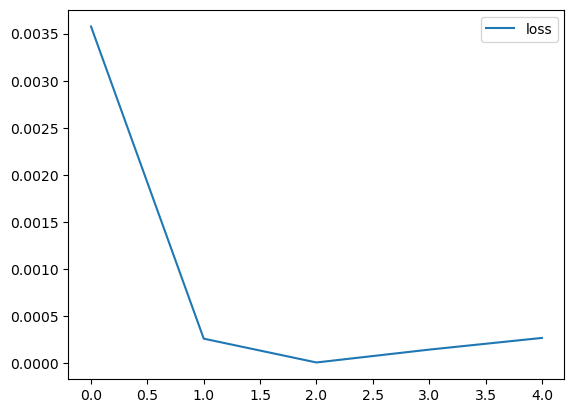

In [28]:
losses.plot()

In [29]:
first_eval_batch = scaled_train[-length:]

In [30]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [31]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


array([[0.92926925]], dtype=float32)

In [32]:
scaled_test[0]

array([0.94955134])

In [33]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))


for i in range(len(test)):
    currnt_pred = model.predict(current_batch)[0]
    test_predictions.append(currnt_pred)

    current_batch = np.append(current_batch[:,1:,:], [[currnt_pred]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [34]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [35]:
true_predictions = scaler.inverse_transform(test_predictions)

In [36]:
true_predictions

array([[ 0.85853339],
       [ 0.88244682],
       [ 0.89872126],
       [ 0.89296779],
       [ 0.87941463],
       [ 0.86989275],
       [ 0.84253026],
       [ 0.80465468],
       [ 0.77342805],
       [ 0.72212556],
       [ 0.66052894],
       [ 0.60258451],
       [ 0.53735753],
       [ 0.45772875],
       [ 0.3737522 ],
       [ 0.29612576],
       [ 0.20387937],
       [ 0.10478947],
       [ 0.01023127],
       [-0.09168345],
       [-0.20390921],
       [-0.3121015 ],
       [-0.42321934],
       [-0.54440356],
       [-0.66024273],
       [-0.77308691],
       [-0.88983586],
       [-1.00093731],
       [-1.10551328],
       [-1.20501356],
       [-1.29740859],
       [-1.37849317],
       [-1.45020727],
       [-1.50731864],
       [-1.55326892],
       [-1.58519881],
       [-1.59743489],
       [-1.59556738],
       [-1.5824693 ],
       [-1.55135146],
       [-1.50203336],
       [-1.44651452],
       [-1.37675944],
       [-1.28673533],
       [-1.19171577],
       [-1

In [37]:
test['Predictions'] = true_predictions

C:\Users\kuban\AppData\Local\Temp\ipykernel_13384\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: >

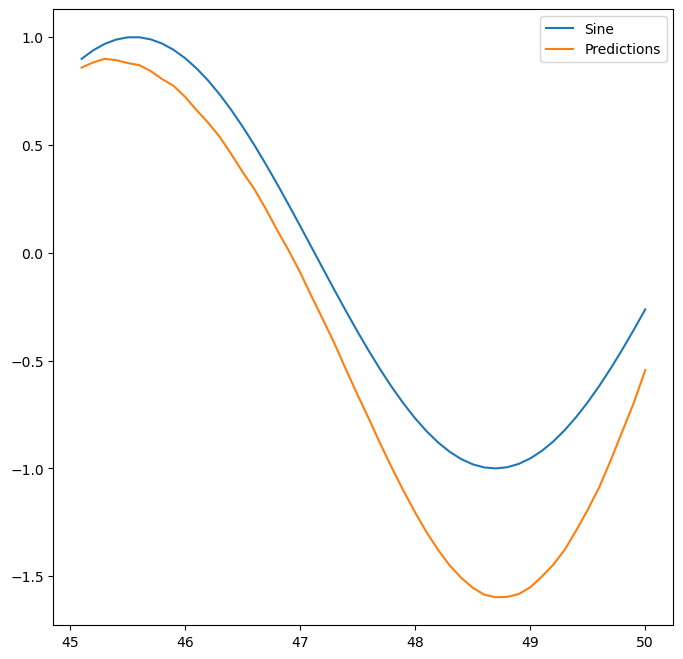

In [38]:
test.plot(figsize=(8,8))

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [41]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [42]:
model = Sequential()
model.add(SimpleRNN(50, input_shape = (length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.fit(generator,epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
 13/402 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1143

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0252 - val_loss: 1.4794e-04
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 3.9444e-05 - val_loss: 2.6868e-06
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 2.5295e-05 - val_loss: 5.5538e-05
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 4.1302e-04 - val_loss: 6.5336e-06


In [44]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))


for i in range(len(test)):
    currnt_pred = model.predict(current_batch)[0]
    test_predictions.append(currnt_pred)

    current_batch = np.append(current_batch[:,1:,:], [[currnt_pred]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━

C:\Users\kuban\AppData\Local\Temp\ipykernel_13384\2217323191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

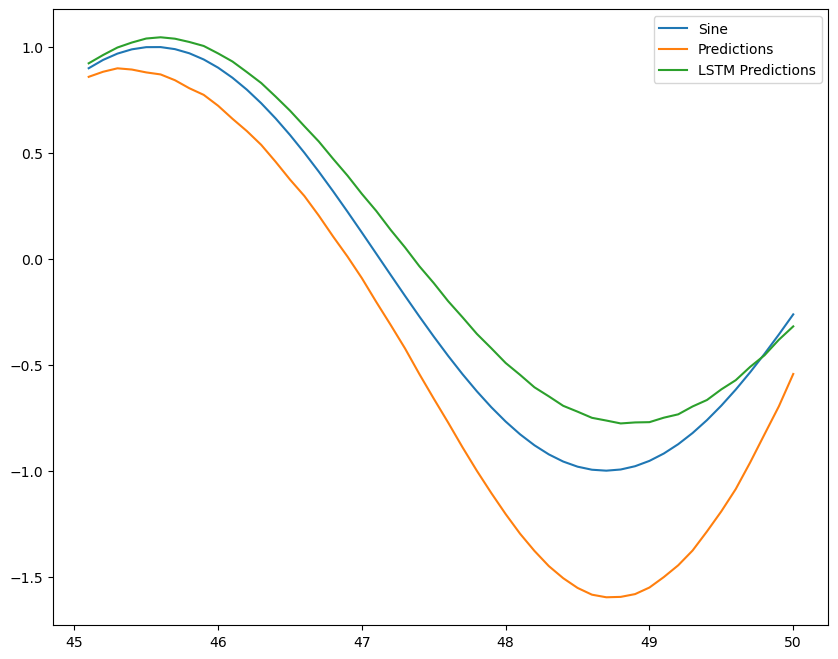

In [45]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(10,8))

<Axes: >

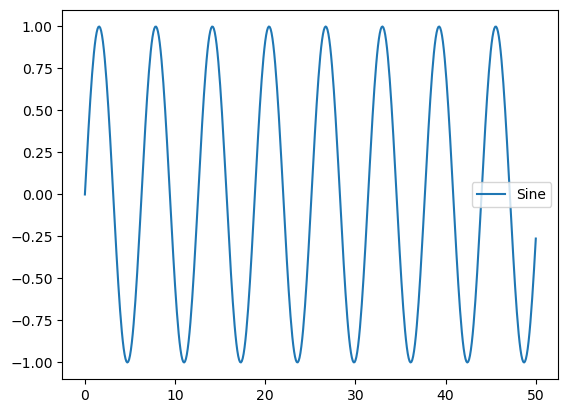

In [46]:
df.plot()

In [47]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [48]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [49]:
model = Sequential()
model.add(SimpleRNN(50, input_shape = (length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse')

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.fit(generator, epochs = 6)

Epoch 1/6
 13/452 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1274

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


452/452 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0122
Epoch 2/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 2.0631e-04
Epoch 3/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 6.6183e-06
Epoch 4/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 9.9732e-06
Epoch 5/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 1.6957e-04
Epoch 6/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 3.3679e-05


In [51]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))


for i in range(25):
    currnt_pred = model.predict(current_batch)[0]
    forecast.append(currnt_pred)

    current_batch = np.append(current_batch[:,1:,:], [[currnt_pred]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [52]:
forecast = scaler.inverse_transform(forecast)

In [53]:
forecast_index = np.arange(50.1,52.6, step = 0.1)

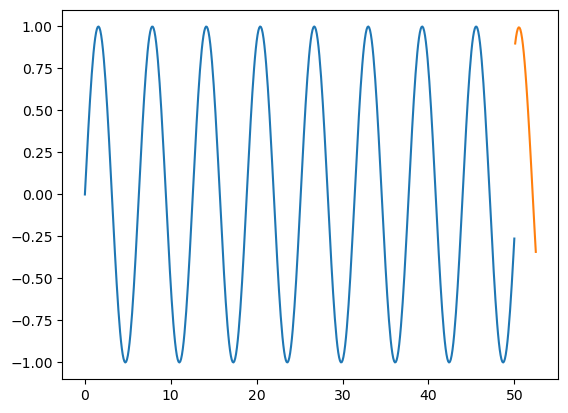

In [54]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index,forecast)